# HR ATTRIBUTION

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [2]:
df = pd.read_csv("HR_Analytics.csv")

In [3]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [4]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

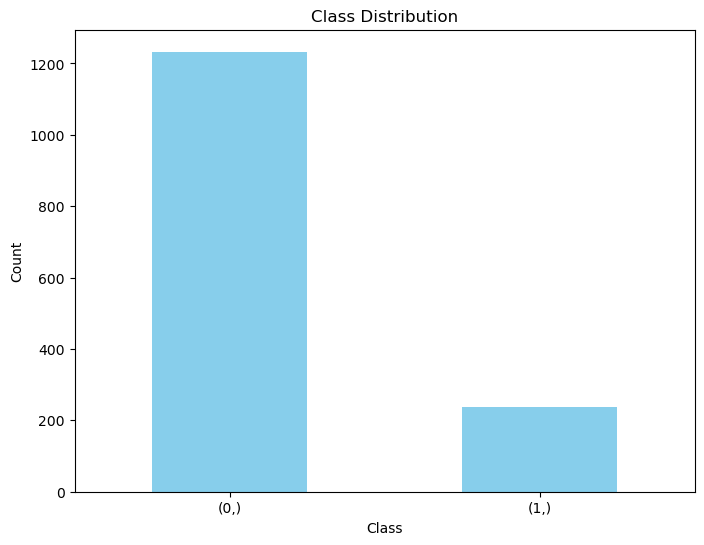

In [5]:
class_counts = y.value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()



In [6]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)




In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)


# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.76


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [9]:

# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [10]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

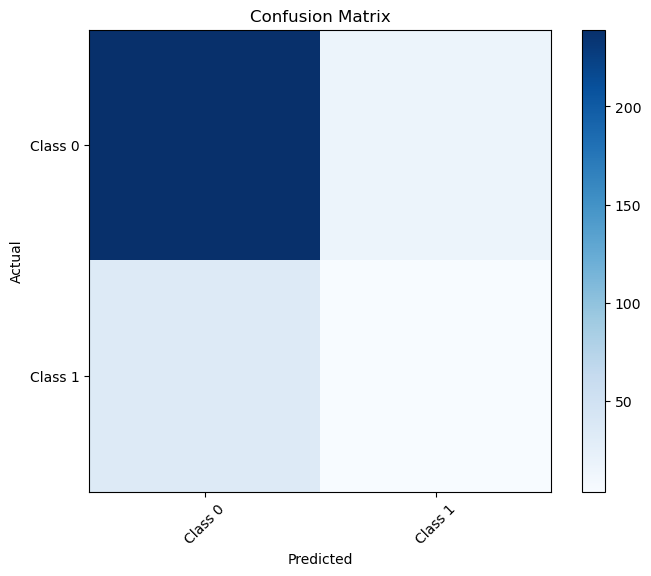

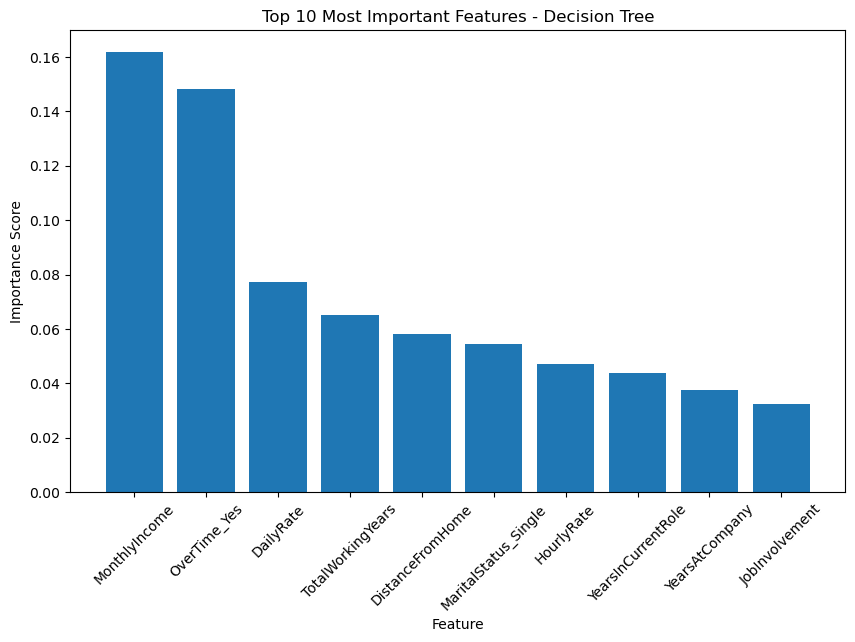

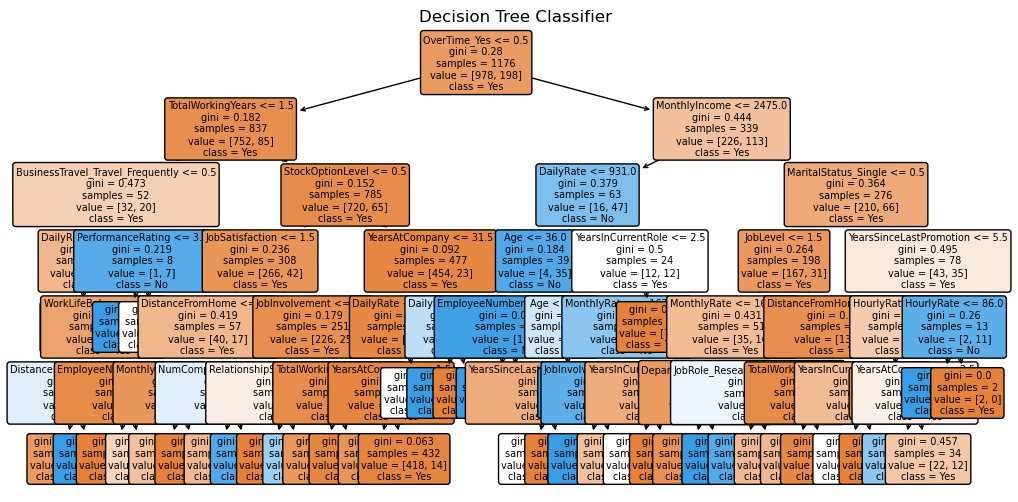

In [11]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()



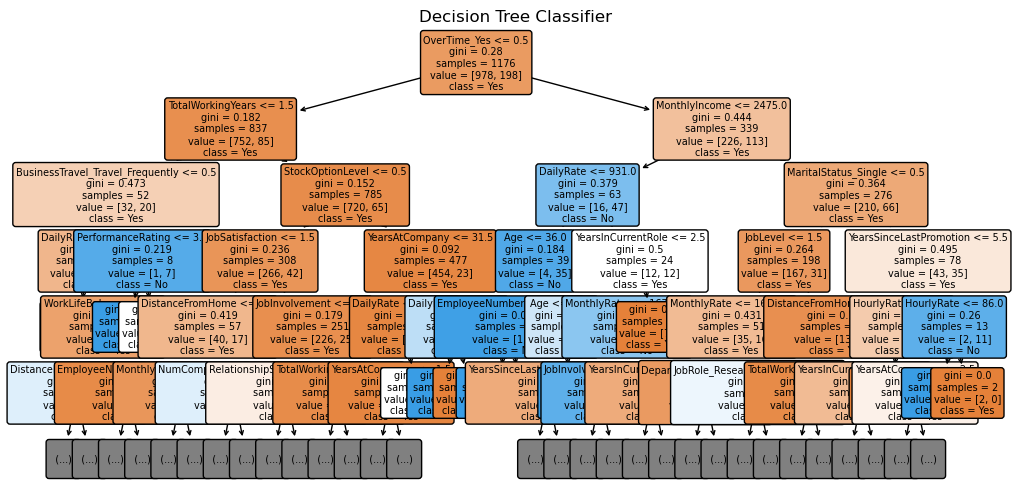

In [12]:
# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=list(X.columns), max_depth=5,
          class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()


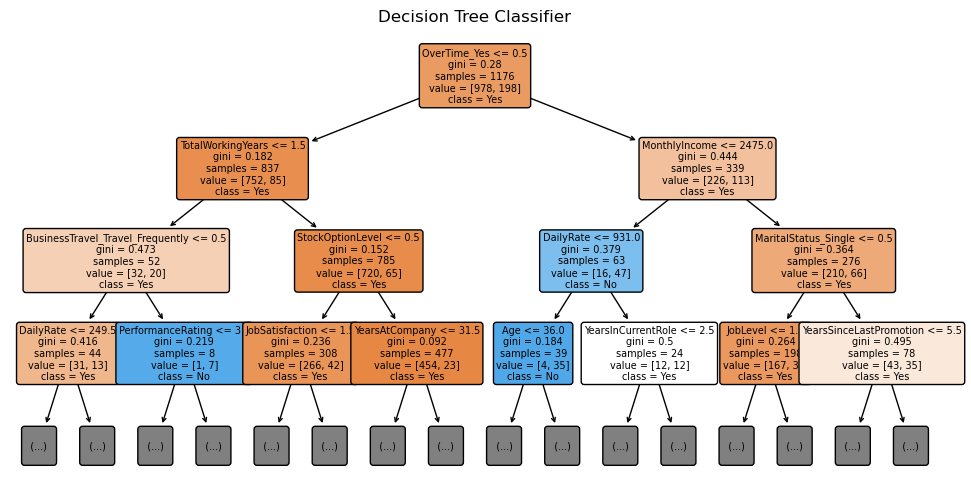

In [13]:
# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=list(X.columns), max_depth=3,
          class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()


# 5.) Looking at the graphs. what would be your suggestions to try to improve customer retention? What additional information would you need for a better plan. Plot anything you think would assist in your assessment.

## ANSWER : 

The above graphical results are mainly the evaluation and analysis of the importance of the model, and the obtained analysis results are the evaluation results of the importance of input variables on output variables. According to the results, monthly income is the most important in the prediction of customer retention rate, so appropriately increasing the monthly income of customers can better improve customer retention rate. The shape of the decision tree also reflects the importance ranking result of the input prediction features. The importance is obtained by calculating the information gain result of each branch by dividing the result variables. The above evaluation results do not evaluate the prediction effect of the model, so it is necessary to add the prediction effect diagram of the model and use the ROC curve to evaluate the results of the model. The results of the graph are shown below.

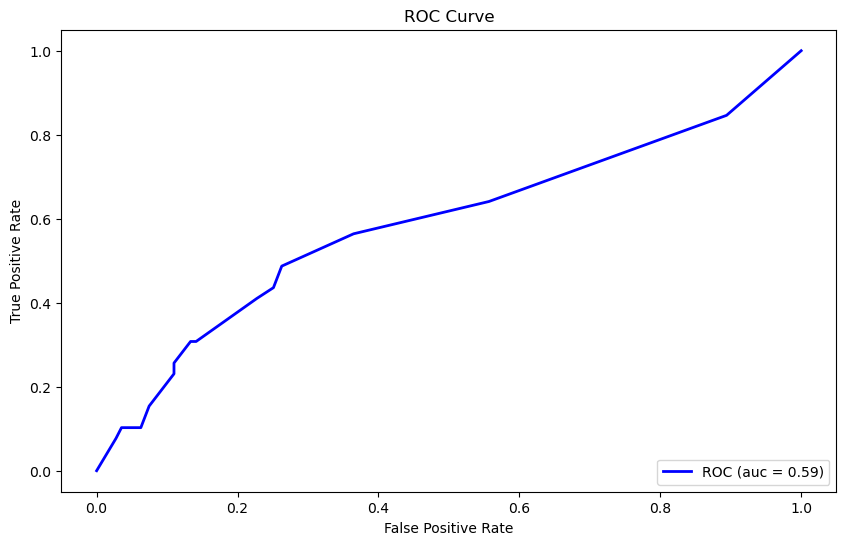

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thersholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, 'b-', label='ROC (auc = {0:.2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

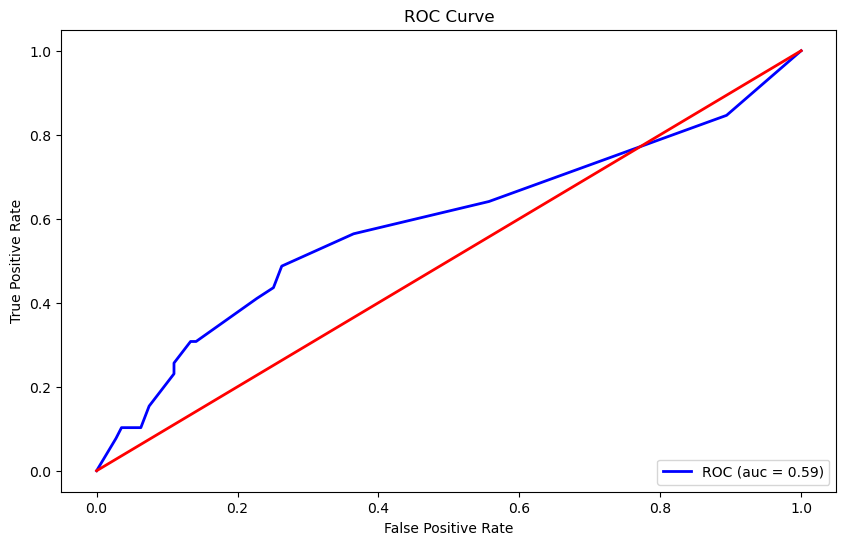

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, 'b-', label='ROC (auc = {0:.2f})'.format(roc_auc), lw=2)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r-', lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

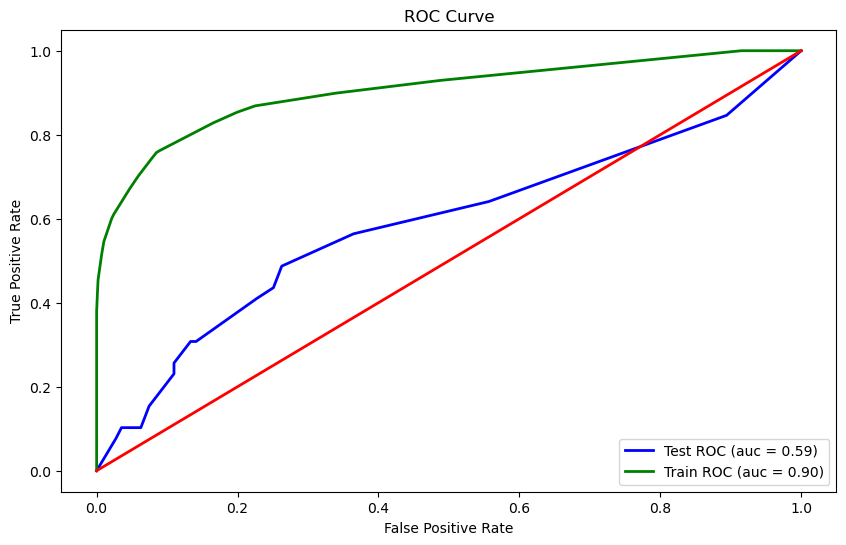

In [16]:
train_fpr, train_tpr, train_thersholds = roc_curve(y_train, clf.predict_proba(x_train)[:, 1], pos_label=1)
train_roc_auc = auc(train_fpr, train_tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, 'b-', label='Test ROC (auc = {0:.2f})'.format(roc_auc), lw=2)
plt.plot(train_fpr, train_tpr, 'g-', label='Train ROC (auc = {0:.2f})'.format(train_roc_auc), lw=2)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r-', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 6.) Using the Training Data, if they made everyone work overtime. What would have been the expected difference in client retention?

According to the result of the decision tree, the Gini coefficient of the customer retention rate of those who work overtime and those who do not work overtime is 0.28, indicating that the customer retention rate of those who work overtime is 0.28 lower than that of those who do not work overtime. Therefore, if everyone works overtime, the customer retention rate will be reduced by 0.28.

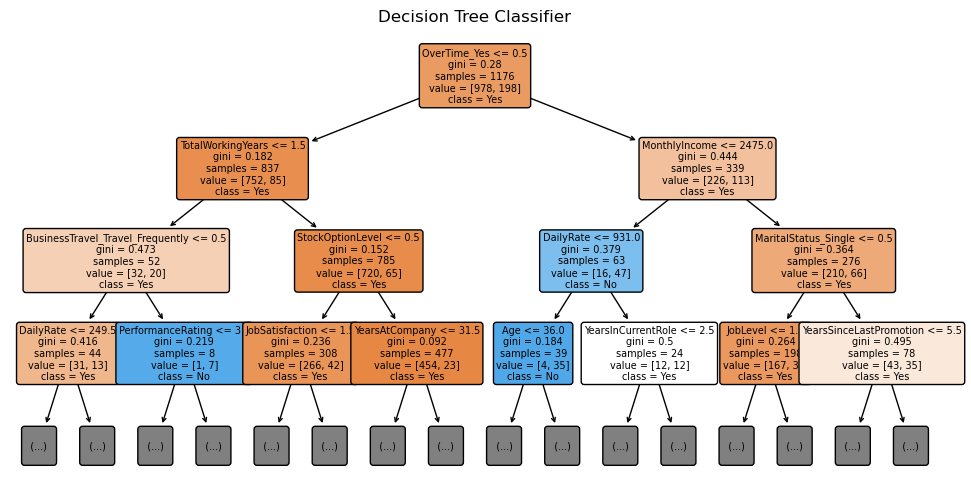

In [17]:
# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=list(X.columns), max_depth=3,
          class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()

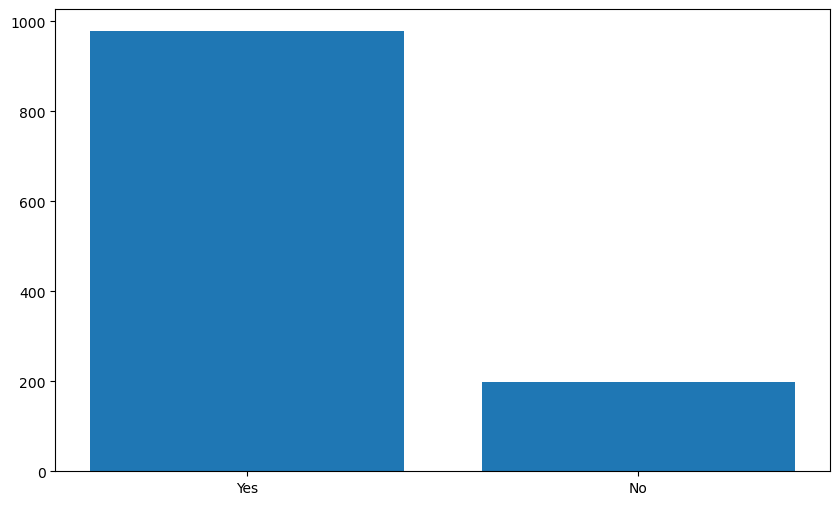

In [18]:
plt.figure(figsize=(10,6))
plt.bar([1,2],[978,198])
plt.xticks([1,2],['Yes','No'])
plt.show()

# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [19]:
x_train_no = x_train.copy()
x_train_no['OverTime_Yes'] = False
y_prob_train_no = clf.predict_proba(x_train_no)
x_train_yes = x_train.copy()
x_train_yes['OverTime_Yes'] = True
y_prob_train_yes = clf.predict_proba(x_train_yes)

In [20]:
No_OverTime = (x_train['MonthlyIncome']+2000)*y_prob_train_no[:, 0]
Yes_OverTime = 2.8*x_train['MonthlyIncome']*(y_prob_train_yes[:, 0])

In [21]:
print(f'Average earnings per person without overtime: {No_OverTime.mean()}')
print(f'Average person earnings without cancelling overtime: {Yes_OverTime.mean()}')

Average earnings per person without overtime: 7607.555395172684
Average person earnings without cancelling overtime: 13743.5142363173


In [22]:
print(f'Average earnings per person without overtime: {No_OverTime.sum()}')
print(f'Average person earnings without cancelling overtime: {Yes_OverTime.sum()}')

Average earnings per person without overtime: 8946485.144723076
Average person earnings without cancelling overtime: 16162372.741909144


## ANSWER : 
By using the training set data, the expected per capita expenditure and total expenditure of whether to cancel overtime work system are estimated, and the expected per capita expenditure and total expected expenditure after the cancellation of overtime work are compared with those without the cancellation of overtime work. The result shows that the per capita expenditure and total expenditure after the cancellation of overtime work are larger than those without the cancellation of overtime work, and the per capita income will be saved by the cancellation of overtime work. And the total per capita spending will be less than 7,215,887 next month. Eliminating the company's overtime policy can reduce the company's overall costs.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

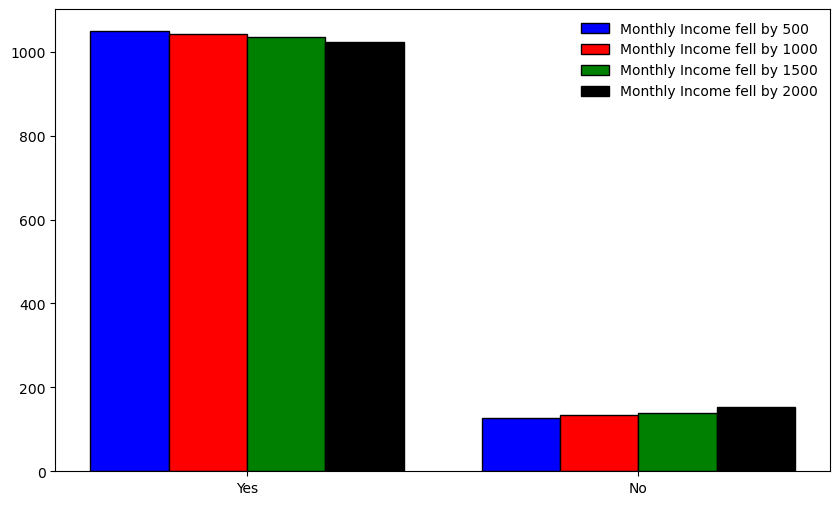

In [23]:
x_train_500 = x_train.copy()
x_train_500['MonthlyIncome'] = x_train_500['MonthlyIncome']-500
y_prob_train_500 = clf.predict(x_train_500)
tab_500 = pd.Series(y_prob_train_500).value_counts()

x_train_1000 = x_train.copy()
x_train_1000['MonthlyIncome'] = x_train_1000['MonthlyIncome']-1000
y_prob_train_1000 = clf.predict(x_train_1000)
tab_1000 = pd.Series(y_prob_train_1000).value_counts()

x_train_1500 = x_train.copy()
x_train_1500['MonthlyIncome'] = x_train_1500['MonthlyIncome']-1500
y_prob_train_1500 = clf.predict(x_train_1500)
tab_1500 = pd.Series(y_prob_train_1500).value_counts()

x_train_2000 = x_train.copy()
x_train_2000['MonthlyIncome'] = x_train_2000['MonthlyIncome']-2000
y_prob_train_2000 = clf.predict(x_train_2000)
tab_2000 = pd.Series(y_prob_train_2000).value_counts()

width=0.2
plt.figure(figsize=(10,6))
plt.bar(tab_500.index-2*width, tab_500, width=0.2, label='Monthly Income fell by 500',color='b',edgecolor='k',zorder=2)
plt.bar(tab_1000.index-width, tab_1000, width=0.2, label='Monthly Income fell by 1000',color='r',edgecolor='k',zorder=2)
plt.bar(tab_1500.index, tab_1500, width=0.2, label='Monthly Income fell by 1500',color='g',edgecolor='k',zorder=2)
plt.bar(tab_2000.index+width, tab_2000, width=0.2, label='Monthly Income fell by 2000',color='k',edgecolor='k',zorder=2)
plt.xticks([-0.1 ,0.9],["Yes","No"])
plt.legend(frameon=False)
plt.show()

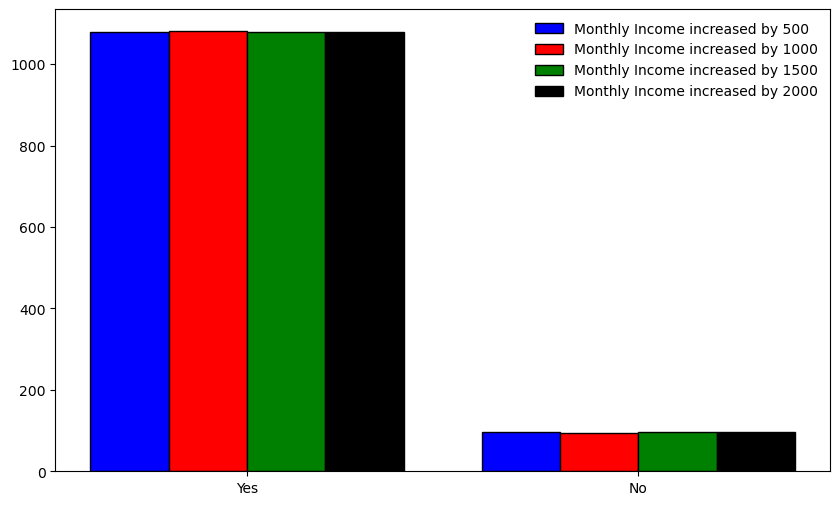

In [24]:
x_train_500 = x_train.copy()
x_train_500['MonthlyIncome'] = x_train_500['MonthlyIncome']+500
y_prob_train_500 = clf.predict(x_train_500)
tab_500 = pd.Series(y_prob_train_500).value_counts()

x_train_1000 = x_train.copy()
x_train_1000['MonthlyIncome'] = x_train_1000['MonthlyIncome']+1000
y_prob_train_1000 = clf.predict(x_train_1000)
tab_1000 = pd.Series(y_prob_train_1000).value_counts()

x_train_1500 = x_train.copy()
x_train_1500['MonthlyIncome'] = x_train_1500['MonthlyIncome']+1500
y_prob_train_1500 = clf.predict(x_train_1500)
tab_1500 = pd.Series(y_prob_train_1500).value_counts()

x_train_2000 = x_train.copy()
x_train_2000['MonthlyIncome'] = x_train_2000['MonthlyIncome']+2000
y_prob_train_2000 = clf.predict(x_train_2000)
tab_2000 = pd.Series(y_prob_train_2000).value_counts()

width=0.2
plt.figure(figsize=(10,6))
plt.bar(tab_500.index-2*width, tab_500, width=0.2, label='Monthly Income increased by 500',color='b',edgecolor='k',zorder=2)
plt.bar(tab_1000.index-width, tab_1000, width=0.2, label='Monthly Income increased by 1000',color='r',edgecolor='k',zorder=2)
plt.bar(tab_1500.index, tab_1500, width=0.2, label='Monthly Income increased by 1500',color='g',edgecolor='k',zorder=2)
plt.bar(tab_2000.index+width, tab_2000, width=0.2, label='Monthly Income increased by 2000',color='k',edgecolor='k',zorder=2)
plt.xticks([-0.1 ,0.9],["Yes","No"])
plt.legend(frameon=False)
plt.show()

## ANSWER : 
The established model is used to predict and analyze the retention rate of employees on the training set through the increase and decrease of monthly income, and the bar chart of the number of customers retained and left after each increase and decrease of income is made. According to the results, the increase of income has no significant impact on the retention rate of employees, while the decrease of income has a significant impact on the reduction of income.